## *Applied Machine Learning*

# *Assignment 5*

## Task 3

***Teammates:***

Karthik Rajaraman Iyer
kr2859@columbia.edu

Anjani Prasad Atluri
aa4462@columbia.edu

In [1]:
#Importing the required library
from PIL import Image
import glob
import keras
from numpy import asarray
import numpy as np
import matplotlib
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.initializers import glorot_uniform
from keras.models import Sequential
from matplotlib import pyplot
from keras.layers import Conv2D, MaxPooling2D, Flatten, Activation, Dense,Input, add, Add, ZeroPadding2D, BatchNormalization,AveragePooling2D, GlobalMaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

from  keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
#importing required libraries
from google.colab import drive

#mounting drive
drive.mount("/content/gdrive",force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#import data and extracting it
!unzip '/content/gdrive/My Drive/cell_images.zip'

The images were read in as smaller resolution (40x40). The reason we used this resolution is because the smallest image in the dataset has the resolution (40x55). We scaled down the images by 255 (value of black in grayscale).

In [0]:
#Reading the images into a list (grayscaled and scaled down by 255)
image_list = []
target= []

for filename in glob.glob('/content/cell_images/Parasitized/*.png'): 
  #The parameter order is width x height
    im=Image.open(filename).convert('L').resize((40,40)) 
    image_list.append(asarray(np.uint8(im))/255)
    target.append(1)

for filename in glob.glob('/content/cell_images/Uninfected/*.png'): 
    im=Image.open(filename).convert('L').resize((40,40)) 
    image_list.append(asarray(np.uint8(im))/255)
    target.append(0)

In [0]:
#convert the image list to array
d=np.stack( image_list,axis=0 )
t=np.asarray(target).reshape(-1,1)

#shuffle the dataset (along the first dimension with the target labels)
X, y = shuffle(d, t)

img_rows=40
img_cols=40

#Re-shaping the array
X_all = X.reshape(X.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

#Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=100)


Seeing if the data is not jumbled while re-shaping

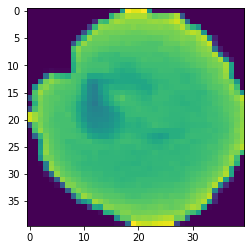

In [52]:
#Seeing if the data is not lost while re-shaping
from matplotlib import pyplot as plt
plt.imshow(X_all[45,:,:,0])
plt.show()

We are not transforming the target variable into categorical variable as this is just a binary class classification. Only one binary class variable will be enough.

###Task 3.1​ 
Start with a convolutional model without residual connections (using batch normalization is likely to be helpful and you should try it, whether you use dropout is your choice).

In [46]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(32, (3, 3), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(32, (3, 3), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))
cnn.compile("adam", "binary_crossentropy", metrics=['accuracy'])
history_cnn = cnn.fit(X_train, y_train,batch_size=256, epochs=20, verbose=1, validation_split=.2)
cnn.evaluate(X_test, y_test)

Train on 17636 samples, validate on 4410 samples
Epoch 1/20
17636/17636 [==============================] - 2s 120us/step - loss: 0.4516 - accuracy: 0.7811 - val_loss: 0.6805 - val_accuracy: 0.5639
Epoch 2/20
17636/17636 [==============================] - 1s 80us/step - loss: 0.2553 - accuracy: 0.8898 - val_loss: 0.6749 - val_accuracy: 0.5497
Epoch 3/20
17636/17636 [==============================] - 1s 81us/step - loss: 0.1755 - accuracy: 0.9315 - val_loss: 0.6427 - val_accuracy: 0.6626
Epoch 4/20
17636/17636 [==============================] - 1s 81us/step - loss: 0.1477 - accuracy: 0.9441 - val_loss: 0.6601 - val_accuracy: 0.5683
Epoch 5/20
17636/17636 [==============================] - 1s 81us/step - loss: 0.1275 - accuracy: 0.9521 - val_loss: 0.8129 - val_accuracy: 0.5277
Epoch 6/20
17636/17636 [==============================] - 1s 79us/step - loss: 0.1191 - accuracy: 0.9564 - val_loss: 0.6139 - val_accuracy: 0.6855
Epoch 7/20
17636/17636 [==============================] - 1s 81us/st

[0.267684856897047, 0.9363207817077637]

The accuracy on the test set it 93.63%. Having batch normalization improved the accuracy.

### Task 3.2 ​
Augment the data using rotations, mirroring and possibly other transformations. How much can you improve your original model by data augmentation?

In [48]:
from keras import backend as K 
import gc

K.clear_session()
gc.collect()

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2)

#splittng the data into train and validation set
X_train_fin, X_val, y_train_fin, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1234)

datagen.fit(X_train_fin)

history_cnn1 = cnn.fit_generator(datagen.flow(X_train_fin, y_train_fin, batch_size=32),steps_per_epoch=len(X_train_fin) / 32, epochs=20)
cnn.evaluate(X_test, y_test)

Epoch 1/20
552/551 [==============================] - 8s 15ms/step - loss: 0.1987 - accuracy: 0.9223
Epoch 2/20
552/551 [==============================] - 8s 15ms/step - loss: 0.1887 - accuracy: 0.9253
Epoch 3/20
552/551 [==============================] - 8s 15ms/step - loss: 0.1932 - accuracy: 0.9252
Epoch 4/20
552/551 [==============================] - 8s 15ms/step - loss: 0.1944 - accuracy: 0.9241
Epoch 5/20
552/551 [==============================] - 8s 15ms/step - loss: 0.1861 - accuracy: 0.9276
Epoch 6/20
552/551 [==============================] - 8s 15ms/step - loss: 0.1901 - accuracy: 0.9261
Epoch 7/20
552/551 [==============================] - 8s 15ms/step - loss: 0.1869 - accuracy: 0.9271
Epoch 8/20
552/551 [==============================] - 8s 15ms/step - loss: 0.1939 - accuracy: 0.9247
Epoch 9/20
552/551 [==============================] - 8s 15ms/step - loss: 0.1814 - accuracy: 0.9297
Epoch 10/20
552/551 [==============================] - 8s 15ms/step - loss: 0.1832 - accura

[0.15559678318733228, 0.944847583770752]

We can see that the loss nearly halved and the accuracy increased after using the augmentation technique. This might be because the cells in the images are in different orientations (rotations, width and height shifts). We haven't used feature_wise_normalization as we have already scaled the data down to 255th of its original size.

### Task 3.3​ 

Build a deeper model using residual connections. Show that you can build a deep model that would not be able to learn if you remove the residual connections (i.e. compare a deep model with and without residual connections while the rest of the architecture is constant). Feel free to reuse existing architectures from the literature or use them as inspiration for your own. You can find commonly used architectures here:
https://keras.io/applications/
However, the point of the exercise is to learn the weights from scratch, so please do not reuse the weights shipped with these applications.

Let us use resnet50 architecture for this part. First we will remove the skip connections from it and show that the model doesn't learn anything.

The code for resnet was taken from https://datascience-enthusiast.com/DL/Residual_Networks_v2.html

In [12]:
!git clone 'https://github.com/marcopeix/Deep_Learning_AI.git'

Cloning into 'Deep_Learning_AI'...
remote: Enumerating objects: 311, done.
remote: Total 311 (delta 0), reused 0 (delta 0), pack-reused 311
Receiving objects: 100% (311/311), 42.05 MiB | 32.84 MiB/s, done.
Resolving deltas: 100% (135/135), done.


In [13]:
cd Deep_Learning_AI/'4.Convolutional Neural Networks'/'2.Deep Convolutional Models'

/content/Deep_Learning_AI/4.Convolutional Neural Networks/2.Deep Convolutional Models


In [0]:
from resnets_utils import *

In [0]:
#Defining the identity block of resnet without the skip connections

def identity_block(X, f, filters, stage, block):
    
    # Defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    
    # Second component of main path
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1, 1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path 
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1, 1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)
    
    return X

In [0]:
#Defining the convolution block without the skip connections

def convolutional_block(X, f, filters, stage, block, s=2):

    # Defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    # Retrieve Filters
    F1, F2, F3 = filters

    ##### MAIN PATH #####
    # First component of main path 
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    # Second component of main path
    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    return X


In [0]:
#creating ResNet-50

def ResNet50(input_shape = (40, 40, 1)):
    
    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    
    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)
    
    # Stage 1
    X = Conv2D(64, (7, 7), strides = (2, 2), name = 'conv1', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f = 3, filters = [64, 64, 256], stage = 2, block='a', s = 1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')

    # Stage 3
    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    # Stage 4
    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    # Stage 5
    X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    # AVGPOOL
    X = AveragePooling2D(pool_size=(2,2), padding='same')(X)

    # Output layer
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fca' + str(1), kernel_initializer = glorot_uniform(seed=0))(X)
    
    
    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model

In [0]:
#Training the architecture on our data
from keras import backend as K 
import gc

K.clear_session()
gc.collect()

model = ResNet50(input_shape = input_shape)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_cnn2 = model.fit(X_train, y_train,batch_size=256, epochs=20, verbose=1, validation_split=0.2)
model.evaluate(X_test, y_test)

Train on 17636 samples, validate on 4410 samples
Epoch 1/20
17636/17636 [==============================] - 38s 2ms/step - loss: 0.6775 - accuracy: 0.7178 - val_loss: 1.4503 - val_accuracy: 0.5075
Epoch 2/20
17636/17636 [==============================] - 20s 1ms/step - loss: 0.2921 - accuracy: 0.8732 - val_loss: 1.3764 - val_accuracy: 0.5075
Epoch 3/20
17636/17636 [==============================] - 19s 1ms/step - loss: 0.2016 - accuracy: 0.9205 - val_loss: 2.4304 - val_accuracy: 0.5075
Epoch 4/20
17636/17636 [==============================] - 20s 1ms/step - loss: 0.1828 - accuracy: 0.9304 - val_loss: 0.7834 - val_accuracy: 0.5075
Epoch 5/20
17636/17636 [==============================] - 20s 1ms/step - loss: 0.1556 - accuracy: 0.9402 - val_loss: 2.3212 - val_accuracy: 0.5075
Epoch 6/20
17636/17636 [==============================] - 20s 1ms/step - loss: 0.1237 - accuracy: 0.9534 - val_loss: 1.9552 - val_accuracy: 0.5075
Epoch 7/20
17636/17636 [==============================] - 20s 1ms/ste

[15.783321013817421, 0.49111029505729675]

We can see that the loss of the model is high, and the test accuracy is low, and the validation accuracy is fluctuating without the skip connections.Let us try adding the skip connections. 

### Adding Residual connections

In [0]:
del identity_block
del convolutional_block

In [0]:
#Adding the skip connection in the identity block
def identity_block(X, f, filters, stage, block):
    
    # Defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X
    
    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    
    # Second component of main path
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1, 1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path 
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1, 1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    return X

In [0]:
#Adding skip connection in the Convolutional Block
def convolutional_block(X, f, filters, stage, block, s=2):

    # Defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    # Retrieve Filters
    F1, F2, F3 = filters

    # Save the input value
    X_shortcut = X

    ##### MAIN PATH #####
    # First component of main path 
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    # Second component of main path
    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    ##### SHORTCUT PATH #### 
    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [0]:
#Training the architecture on our data

model = ResNet50(input_shape = input_shape)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_cnn3 = model.fit(X_train, y_train,batch_size=256, epochs=20, verbose=1)
model.evaluate(X_test, y_test)

Epoch 1/20
22046/22046 [==============================] - 35s 2ms/step - loss: 0.6352 - accuracy: 0.7547
Epoch 2/20
22046/22046 [==============================] - 24s 1ms/step - loss: 0.3554 - accuracy: 0.8616
Epoch 3/20
22046/22046 [==============================] - 23s 1ms/step - loss: 0.2361 - accuracy: 0.9101
Epoch 4/20
22046/22046 [==============================] - 23s 1ms/step - loss: 0.1803 - accuracy: 0.9293
Epoch 5/20
22046/22046 [==============================] - 23s 1ms/step - loss: 0.1446 - accuracy: 0.9445
Epoch 6/20
22046/22046 [==============================] - 23s 1ms/step - loss: 0.1253 - accuracy: 0.9499
Epoch 7/20
22046/22046 [==============================] - 23s 1ms/step - loss: 0.1157 - accuracy: 0.9541
Epoch 8/20
22046/22046 [==============================] - 23s 1ms/step - loss: 0.1073 - accuracy: 0.9586
Epoch 9/20
22046/22046 [==============================] - 23s 1ms/step - loss: 0.1011 - accuracy: 0.9607
Epoch 10/20
22046/22046 [==============================

[0.23443536100306256, 0.9272496104240417]

We have seen that adding the skip connections for the ResNet-50 architecture has helped the model learn. So we can conclude that for deeper networks adding skip connections helps.